# Clasificación supervisada

## Contexto 
La clasificación supervisada suele ser valiosa si dentro de los objetivos de nuestro proyecto está predecir una variable en base a otra, concretamente, en este notebook exploraremos el uso de tres algoritmos de clasificación supervisada para predecir el tipo de habitación que se ocupará en base al número de menores que irán

## Preprocesamiento de datos

In [1]:
import pandas as pd 

rsv = pd.read_csv('/Users/manuelrodriguez/Documents/Proyectos/Clustera/Data/Reservaciones.csv')
rsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102154 entries, 0 to 102153
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Reserva              102154 non-null  int64  
 1   Fecha_hoy               102154 non-null  object 
 2   h_num_per               102154 non-null  int64  
 3   h_num_adu               102154 non-null  int64  
 4   h_num_men               102154 non-null  int64  
 5   h_num_noc               102154 non-null  int64  
 6   h_tot_hab               102154 non-null  int64  
 7   ID_Tipo_Habitacion      102154 non-null  int64  
 8   ID_Pais_Origen          102154 non-null  int64  
 9   h_edo                   102154 non-null  object 
 10  h_tfa_total             102154 non-null  float64
 11  moneda_cve              102154 non-null  int64  
 12  Hotel_cve               102154 non-null  object 
 13  Agencia_nombre          102154 non-null  object 
 14  Estado_cve          

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

rsv = pd.read_csv('/Users/manuelrodriguez/Documents/Proyectos/Clustera/Data/Reservaciones.csv')

features = ['h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc']
X = rsv[features]
y = rsv['ID_Tipo_Habitacion']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento de los modelos y búsqueda de hiperparámetros



In [5]:
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 6]}

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb, cv=3, n_jobs=-1)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are no

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6], 'n_estimators': [100, 200]})

## Comparación de resultados 

RandomForest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        19
           4       0.28      0.28      0.28      5333
           5       0.00      0.00      0.00       609
           6       0.21      0.02      0.04      1392
           7       0.00      0.00      0.00       215
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00       135
          13       0.33      0.00      0.01      1051
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00         6
          17  

/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

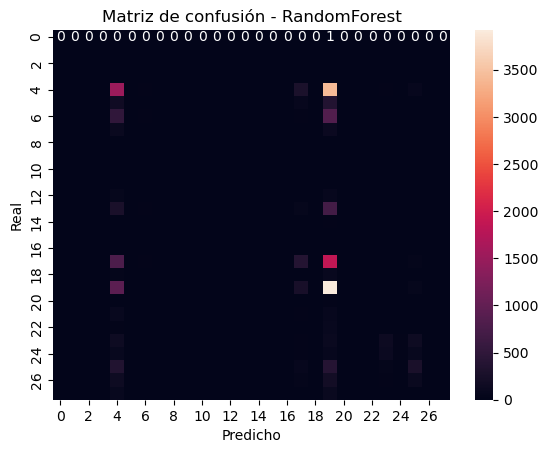

XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        19
           4       0.29      0.28      0.28      5333
           5       1.00      0.00      0.00       609
           6       0.21      0.02      0.04      1392
           7       0.20      0.00      0.01       215
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00       135
          13       0.17      0.00      0.00      1051
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00         6
          17       

/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

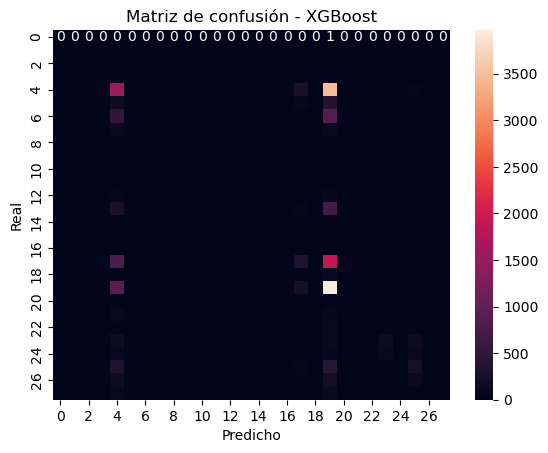

,Modelo,Mejores Hiperparámetros,Accuracy
0,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",0.306348
1,XGBoost,"{'max_depth': 6, 'n_estimators': 100}",0.306397


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

models = {'RandomForest': rf, 'XGBoost': xgb}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Modelo': name,
        'Mejores Hiperparámetros': model.best_params_,
        'Accuracy': acc
    })
    print(f"{name}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Matriz de confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

results_df = pd.DataFrame(results)
results_df